<a href="https://colab.research.google.com/github/guilhermelaviola/IntegratingPracticesInDataScienceForBusiness/blob/main/Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks for Business**
In this part we study the development of Neural network models using specific tools and applying them to a business context. We began by structuring the model using certain tools, such as Pandas, SKLearn and TensorFlow, which is especially useful for Deep Learning.

In [1]:
 # Importing all the necessary libraries:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Creating a random dataset for studying it:
months = pd.date_range(start='2025-01-01', periods=24, freq='M')
sales = np.random.randint(80000, 120000, size=24) * 2
df = pd.DataFrame({'Month': months, 'Sales': sales})

# Generating a DataFrame from the dataset above:
X = df[['Month']]
y = df['Sales']

/tmp/ipython-input-2-1467569112.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2025-01-01', periods=24, freq='M')


In [3]:
# Creating the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting datetime to numerical format (e.g., ordinal)
X_train['Month'] = X_train['Month'].apply(lambda x: x.toordinal())
X_test['Month'] = X_test['Month'].apply(lambda x: x.toordinal())

# Normalizing the data:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Creating the Neural Network:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Training the model:
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 37969735680.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 37969735680.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 37969727488.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 37969723392.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 37969719296.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 37969711104.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - loss: 37969711104.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 37969702912.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 37969702912.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 37969698816.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 37969694720.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - loss: 37969690624.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 37969682432.0000
Epoch 14/10

In [6]:
# Evaluating the model:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 32298733568.0000
Loss: 32298733568.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


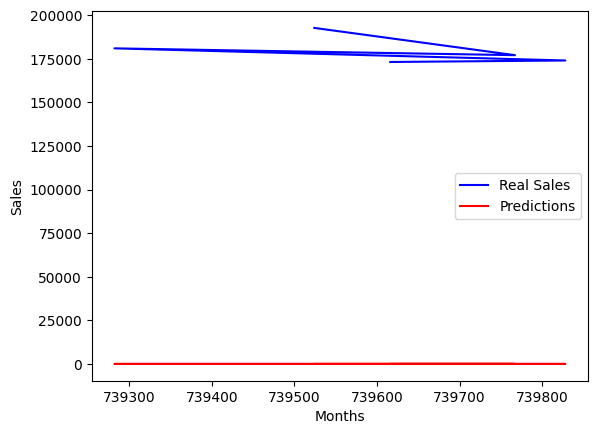

In [7]:
# Visualizing the results:
plt.plot(X_test, y_test, 'b', label='Real Sales')
plt.plot(X_test,
model.predict(X_test_scaled), 'r', label='Predictions')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()

## **Conclusion**
Neural networks offer a powerful tool for forecasting and analysis in business, enabling better data-driven decision-making. Building and tuning neural network models requires a detailed understanding of the data and business objectives.